In [1]:
'''Part 1:
    
Understanding Regularization
Regularization in the context of deep learning refers to techniques used to prevent overfitting and improve the generalization capability of models. Overfitting occurs when a model performs well on the training data but fails to generalize to unseen data. Regularization techniques help address this issue by adding constraints or penalties to the model's parameters during training.
Regularization is important for the following reasons:
Prevent Overfitting: Deep learning models have a high capacity to memorize training data, which can lead to overfitting. Regularization techniques help control the complexity of the model and prevent it from fitting the noise or idiosyncrasies in the training data.
Improve Generalization: By preventing overfitting, regularization techniques enhance the model's ability to generalize to unseen data. They encourage the model to capture the underlying patterns and dependencies in the data rather than memorizing specific examples.

Bias-Variance Tradeoff:
The bias-variance tradeoff is a fundamental concept in machine learning. It refers to the tradeoff between a model's ability to fit the training data (low bias) and its ability to generalize to new, unseen data (low variance).
A model with high bias tends to underfit the training data and has a simplified representation. On the other hand, a model with high variance overfits the training data and captures noise or random fluctuations.
Regularization helps in addressing the bias-variance tradeoff by introducing constraints or penalties to the model's parameters. It reduces the model's capacity to fit the training data too closely, thereby reducing overfitting (high variance) and improving generalization (low bias).

L1 and L2 Regularization:
L1 and L2 regularization are two commonly used techniques that add penalties to the loss function during training.
L1 regularization, also known as Lasso regularization, adds a penalty proportional to the absolute value of the parameters' magnitudes. It encourages the model to have sparse parameter values and can lead to feature selection, as some parameters may be driven to exactly zero.
L2 regularization, also known as Ridge regularization, adds a penalty proportional to the square of the parameters' magnitudes. It encourages the model to have small parameter values and tends to distribute the penalty across all parameters.
The main difference between L1 and L2 regularization lies in the penalty calculation and their effects on the model. L1 regularization can yield sparse models with some parameters being exactly zero, while L2 regularization generally results in models with smaller parameter values but none being exactly zero.

Regularization for Preventing Overfitting and Improving Generalization:
Regularization techniques play a crucial role in preventing overfitting and improving the generalization of deep learning models. They achieve this by:
Reducing Model Complexity: Regularization techniques impose constraints on the model's parameters, limiting their capacity to fit the training data too closely. This prevents the model from memorizing noise or idiosyncrasies in the training data, reducing overfitting.
Encouraging Simplicity: Regularization encourages the model to have simpler and smoother representations. By penalizing large parameter values, it discourages the model from relying too heavily on individual training examples, which leads to improved generalization.

Balancing Bias and Variance: Regularization helps strike a balance between bias and variance. By reducing overfitting, it decreases the variance, improving the model's ability to generalize to unseen data. At the same time, it introduces a controlled amount of bias, ensuring the model captures the underlying patterns in the data.
Regularization techniques act as a form of regularization pressure during training, nudging the model towards more generalized solutions and preventing it from overfitting the training data
'''

SyntaxError: unterminated string literal (detected at line 4) (2567284632.py, line 4)

In [ ]:
'''Part 2: Regularization Techniques

Dropout Regularization:
Dropout regularization is a technique that helps reduce overfitting by randomly dropping out a fraction of the neurons during training. During each training iteration, a subset of neurons is temporarily ignored, forcing the remaining neurons to learn more robust and independent representations.
The impact of Dropout on model training and inference includes:
Reducing Overfitting: Dropout acts as a form of regularization by preventing complex co-adaptations among neurons. It helps to avoid over-reliance on specific neurons or features, leading to improved generalization.
Improving Model Robustness: Dropout forces the model to learn more redundant representations, making it more resilient to noise and variations in the input data.
Ensemble Effect: Dropout can be seen as training an ensemble of multiple sub-models. At inference time, the ensemble effect is approximated by scaling the weights of the retained neurons. This leads to improved model performance and reduced overfitting.

Early Stopping:
Early stopping is a form of regularization that helps prevent overfitting during the training process. It involves monitoring the model's performance on a validation set and stopping the training when the performance starts to degrade.
The concept of early stopping is based on the observation that as training progresses, the model tends to overfit the training data, resulting in a decrease in performance on the validation set. By stopping the training at an early stage, before overfitting occurs, we can achieve better generalization.
Early stopping prevents the model from becoming too complex and captures the optimal tradeoff between bias and variance. It provides a simple and effective way to avoid overfitting without requiring additional hyperparameters.

Batch Normalization:
Batch normalization is a regularization technique that normalizes the activations of each layer in a neural network by utilizing batch statistics during training. It helps address the problem of internal covariate shift and accelerates the convergence of the model.
The role of batch normalization as a form of regularization includes:
Reducing Internal Covariate Shift: Batch normalization ensures that the mean and variance of the input to each layer are normalized. This stabilizes the training process, prevents drastic changes in the network's internal distributions, and enables faster convergence.
Smoothing Decision Boundaries: Batch normalization smooths the decision boundaries of the model. By normalizing the activations, it helps prevent the model from being sensitive to small changes in input and improves its generalization.
Reducing the Need for Dropout: Batch normalization can sometimes reduce the need for Dropout regularization. It provides some inherent noise in the training process, similar to what Dropout achieves, leading to improved model robustness and generalization.'''

### part 3

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

 # model with dropout
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_dropout = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# Evaluate the model performance
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Set Performance: Loss =", loss, " Accuracy =", accuracy)

2023-07-05 19:50:50.494107: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 19:50:50.566193: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 19:50:50.568141: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 19:50:52.157031: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5837 - accuracy: 0.8224 - val_loss: 0.2654 - val_accuracy: 0.9263
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3788 - accuracy: 0.8853 - val_loss: 0.2275 - val_accuracy: 0.9343
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.2154 - accuracy: 0.9350
Test Set Performance: Loss = 0.21538005769252777  Accuracy = 0.9350000023841858


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

 # model without dropout
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_no_dropout = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# Evaluate the model performance
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Set Performance: Loss =", loss, " Accuracy =", accuracy)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4022 - accuracy: 0.8885 - val_loss: 0.2372 - val_accuracy: 0.9343
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2273 - accuracy: 0.9350 - val_loss: 0.1976 - val_accuracy: 0.9447
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.1856 - accuracy: 0.9455
Test Set Performance: Loss = 0.18558941781520844  Accuracy = 0.9455000162124634


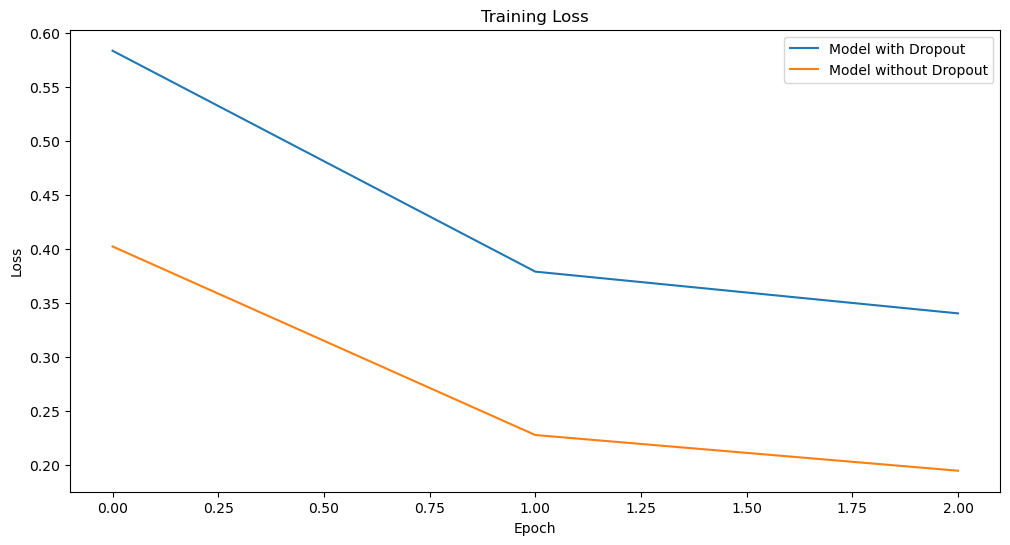

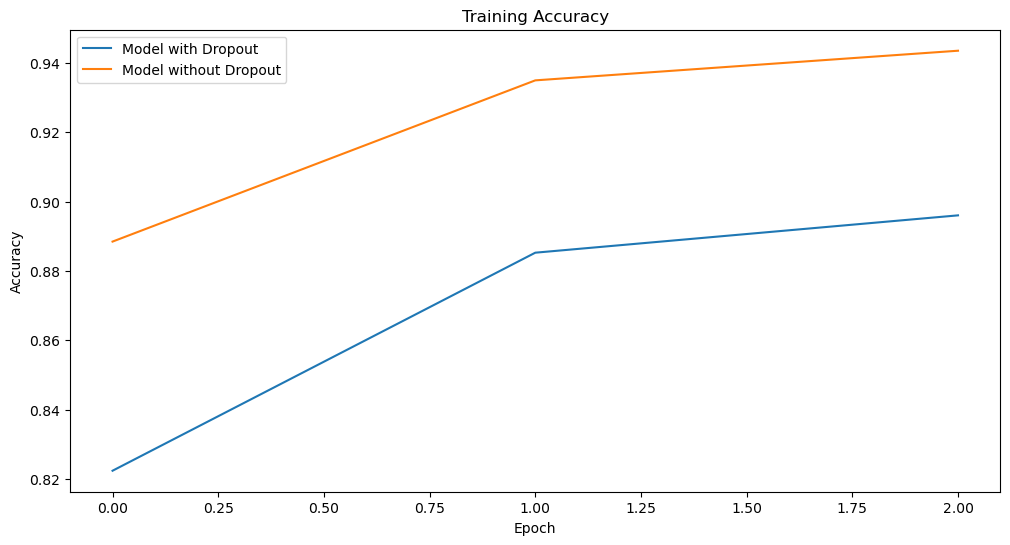

In [5]:
import matplotlib.pyplot as plt

# Get the training history for both models
history_dropout = history_dropout.history
history_no_dropout = history_no_dropout.history

# Plot learning curves (loss)
plt.figure(figsize=(12, 6))
plt.plot(history_dropout['loss'], label='Model with Dropout')
plt.plot(history_no_dropout['loss'], label='Model without Dropout')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot learning curves (accuracy)
plt.figure(figsize=(12, 6))
plt.plot(history_dropout['accuracy'], label='Model with Dropout')
plt.plot(history_no_dropout['accuracy'], label='Model without Dropout')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

